In [209]:
!pip install tweepy pandas

import tweepy
import pandas as pd

# Step 1: Authenticate using Bearer Token
bearer_token = "AAAAAAAAAAAAAAAAAAAAADLqygEAAAAAvKIHiLj3LoYGFY2CmXvgSxhESjo%3DDtHSIUT1z6QI8rLwsN9U5SbWUlrTX33o4nx3SY9q9bEbSKjltn"

# Step 2: Initialize Tweepy Client
client = tweepy.Client(bearer_token=bearer_token)

# Step 3: Define Search Query
query = "AI technology -is:retweet lang:en"  # Fetch tweets about AI (Excluding retweets)

# Step 4: Fetch Recent Tweets (Max 100 per request)
tweets = client.search_recent_tweets(query=query, tweet_fields=["created_at"], max_results=100)

# Step 5: Store Tweets in a Pandas DataFrame
data = [[tweet.created_at, tweet.text] for tweet in tweets.data]
df = pd.DataFrame(data, columns=["created_at", "tweet"])

# Step 6: Display First 5 Tweets
print(df.head())


TooManyRequests: 429 Too Many Requests
Too Many Requests

In [210]:
print(df.head(100))


                  created_at  \
0  2025-02-04 05:31:01+00:00   
1  2025-02-04 05:30:48+00:00   
2  2025-02-04 05:30:41+00:00   
3  2025-02-04 05:30:28+00:00   
4  2025-02-04 05:30:26+00:00   
..                       ...   
95 2025-02-04 05:03:14+00:00   
96 2025-02-04 05:02:41+00:00   
97 2025-02-04 05:02:07+00:00   
98 2025-02-04 05:02:07+00:00   
99 2025-02-04 05:02:02+00:00   

                                                tweet  
0   Check out SupplyVest's innovative approach to ...  
1   #cPenNetwork is committed to becoming a revolu...  
2   Using AI In litigation: Applications, Advice, ...  
3   @RnaudBertrand AI as a zero-sum market is dang...  
4   #cPenNetwork is committed to becoming a revolu...  
..                                                ...  
95  Sam Altman Reveals OpenAI’s Plans for AI-Power...  
96  I really do wonder if AI will turn out to be a...  
97  #cPenNetwork is committed to becoming a revolu...  
98  🚀 Breaking barriers in AI &amp; crypto! $LEIA ...  

In [213]:
# Importing the necessary libraries
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

# If not already downloaded, download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /Users/emon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/emon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/emon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [215]:

# Create DataFrame from the data
tweets_df = pd.DataFrame(data)

# Show the first few rows to check the structure
print(tweets_df.head())


                          0                                                  1
0 2025-02-04 05:31:01+00:00  Check out SupplyVest's innovative approach to ...
1 2025-02-04 05:30:48+00:00  #cPenNetwork is committed to becoming a revolu...
2 2025-02-04 05:30:41+00:00  Using AI In litigation: Applications, Advice, ...
3 2025-02-04 05:30:28+00:00  @RnaudBertrand AI as a zero-sum market is dang...
4 2025-02-04 05:30:26+00:00  #cPenNetwork is committed to becoming a revolu...


In [223]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean tweet text
def clean_text(text):
    # Step 1: Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Step 2: Remove non-alphabetic characters (e.g., numbers, punctuation)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Step 3: Convert to lowercase
    text = text.lower()
    
    # Step 4: Tokenize the text
    tokens = word_tokenize(text)
    
    # Step 5: Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Step 6: Return the cleaned text (as a single string)
    return ' '.join(tokens)


In [225]:

# Renaming specific columns
tweets_df.columns = ['created_at', 'tweet']

# Display the DataFrame with new column names
print(tweets_df.columns)


Index(['created_at', 'tweet'], dtype='object')


In [227]:
print(tweets_df.columns)


Index(['created_at', 'tweet'], dtype='object')


In [229]:
print(tweets_df.head())


                 created_at                                              tweet
0 2025-02-04 05:31:01+00:00  Check out SupplyVest's innovative approach to ...
1 2025-02-04 05:30:48+00:00  #cPenNetwork is committed to becoming a revolu...
2 2025-02-04 05:30:41+00:00  Using AI In litigation: Applications, Advice, ...
3 2025-02-04 05:30:28+00:00  @RnaudBertrand AI as a zero-sum market is dang...
4 2025-02-04 05:30:26+00:00  #cPenNetwork is committed to becoming a revolu...


In [231]:
# Apply the cleaning function to the 'tweet' column
tweets_df['cleaned_text'] = tweets_df['tweet'].apply(clean_text)

# Show the cleaned text alongside the original text
print(tweets_df[['tweet', 'cleaned_text']].head())


                                               tweet  \
0  Check out SupplyVest's innovative approach to ...   
1  #cPenNetwork is committed to becoming a revolu...   
2  Using AI In litigation: Applications, Advice, ...   
3  @RnaudBertrand AI as a zero-sum market is dang...   
4  #cPenNetwork is committed to becoming a revolu...   

                                        cleaned_text  
0  check supplyvests innovative approach supply c...  
1  cpennetwork committed becoming revolutionary w...  
2  using ai litigation application advice technology  
3  rnaudbertrand ai zerosum market dangerous ai t...  
4  cpennetwork committed becoming revolutionary w...  


In [233]:
#################################EDA#########################

In [235]:
import pandas as pd

# Check the first few rows and info of the dataframe
print(tweets_df.head())  # Check first 5 rows
print(tweets_df.info())  # Check column data types and null values


                 created_at  \
0 2025-02-04 05:31:01+00:00   
1 2025-02-04 05:30:48+00:00   
2 2025-02-04 05:30:41+00:00   
3 2025-02-04 05:30:28+00:00   
4 2025-02-04 05:30:26+00:00   

                                               tweet  \
0  Check out SupplyVest's innovative approach to ...   
1  #cPenNetwork is committed to becoming a revolu...   
2  Using AI In litigation: Applications, Advice, ...   
3  @RnaudBertrand AI as a zero-sum market is dang...   
4  #cPenNetwork is committed to becoming a revolu...   

                                        cleaned_text  
0  check supplyvests innovative approach supply c...  
1  cpennetwork committed becoming revolutionary w...  
2  using ai litigation application advice technology  
3  rnaudbertrand ai zerosum market dangerous ai t...  
4  cpennetwork committed becoming revolutionary w...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   

In [237]:
################ Sentiment labeled by Vader##############

In [239]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment based on VADER scores
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment function to the cleaned tweets
tweets_df['sentiment'] = tweets_df['cleaned_text'].apply(get_sentiment)

# Show the first few rows with sentiment labels
print(tweets_df[['tweet', 'cleaned_text', 'sentiment']].head())


                                               tweet  \
0  Check out SupplyVest's innovative approach to ...   
1  #cPenNetwork is committed to becoming a revolu...   
2  Using AI In litigation: Applications, Advice, ...   
3  @RnaudBertrand AI as a zero-sum market is dang...   
4  #cPenNetwork is committed to becoming a revolu...   

                                        cleaned_text sentiment  
0  check supplyvests innovative approach supply c...  positive  
1  cpennetwork committed becoming revolutionary w...  positive  
2  using ai litigation application advice technology  negative  
3  rnaudbertrand ai zerosum market dangerous ai t...  negative  
4  cpennetwork committed becoming revolutionary w...  positive  


In [241]:
# Check basic info about the dataset (number of rows, columns, and data types)
print(tweets_df.info())

# Check for missing values
print(tweets_df.isnull().sum())

# Get a basic summary of the numerical columns (if any)
print(tweets_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   created_at    100 non-null    datetime64[ns, UTC]
 1   tweet         100 non-null    object             
 2   cleaned_text  100 non-null    object             
 3   sentiment     100 non-null    object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 3.3+ KB
None
created_at      0
tweet           0
cleaned_text    0
sentiment       0
dtype: int64
                                 created_at  \
count                                   100   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean       2025-02-04 05:17:47.860000+00:00   
min               2025-02-04 05:02:02+00:00   
25%     2025-02-04 05:09:28.750000128+00:00   
50%        2025-02-04 05:19:41.500000

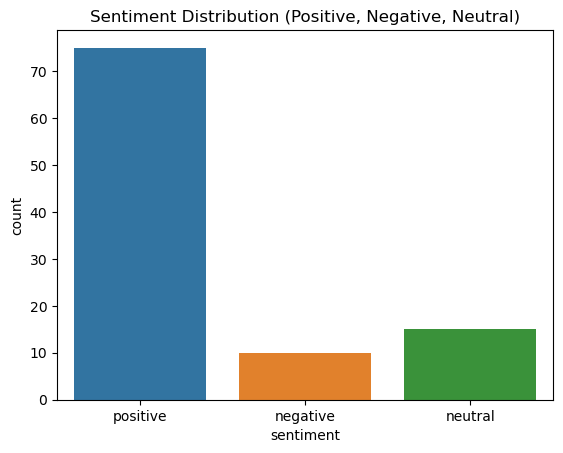

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize sentiment distribution
sns.countplot(x='sentiment', data=tweets_df)
plt.title("Sentiment Distribution (Positive, Negative, Neutral)")
plt.show()


In [247]:
!pip install wordcloud


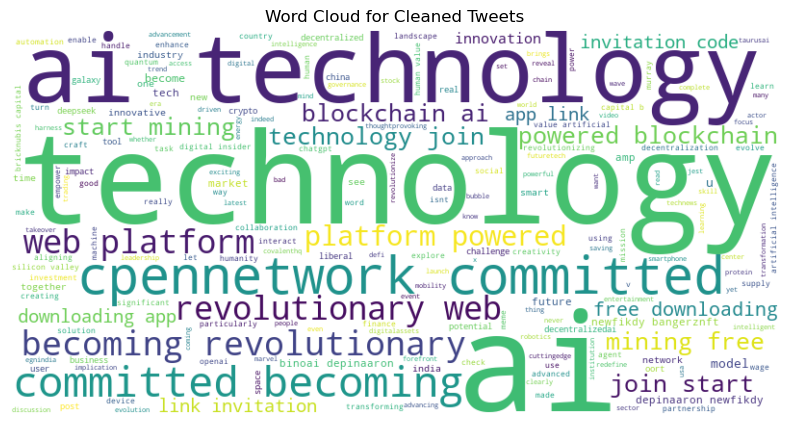

In [249]:
from wordcloud import WordCloud

# Join all tweets into a single text
text = " ".join(tweet for tweet in tweets_df['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axes
plt.title("Word Cloud for Cleaned Tweets")
plt.show()


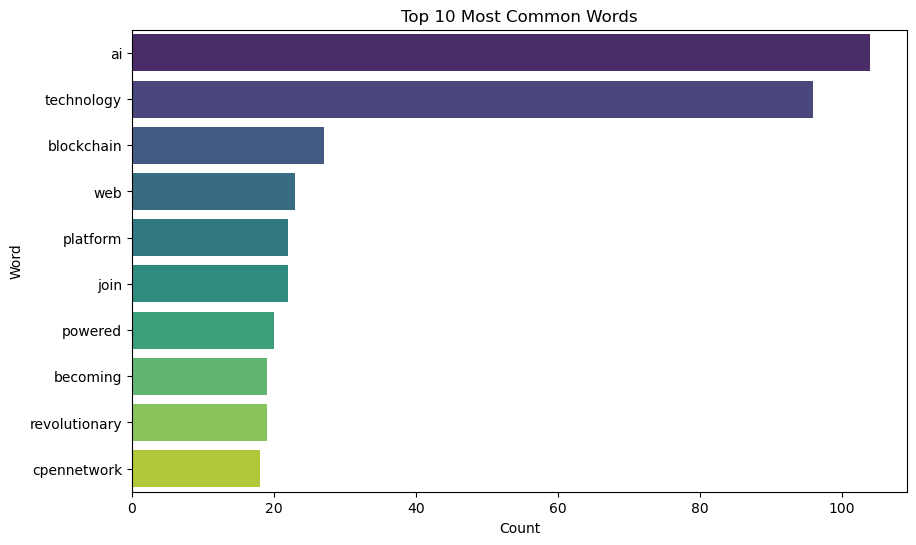

In [251]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

# Remove stop words for better analysis
stop_words = set(stopwords.words('english'))

# Tokenize words from the cleaned text
words = " ".join(tweet for tweet in tweets_df['cleaned_text']).split()
filtered_words = [word for word in words if word not in stop_words]

# Count the most common words
word_counts = Counter(filtered_words)

# Get the 10 most common words
common_words = word_counts.most_common(10)

# Convert to DataFrame
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=common_words_df, palette="viridis")
plt.title("Top 10 Most Common Words")
plt.show()



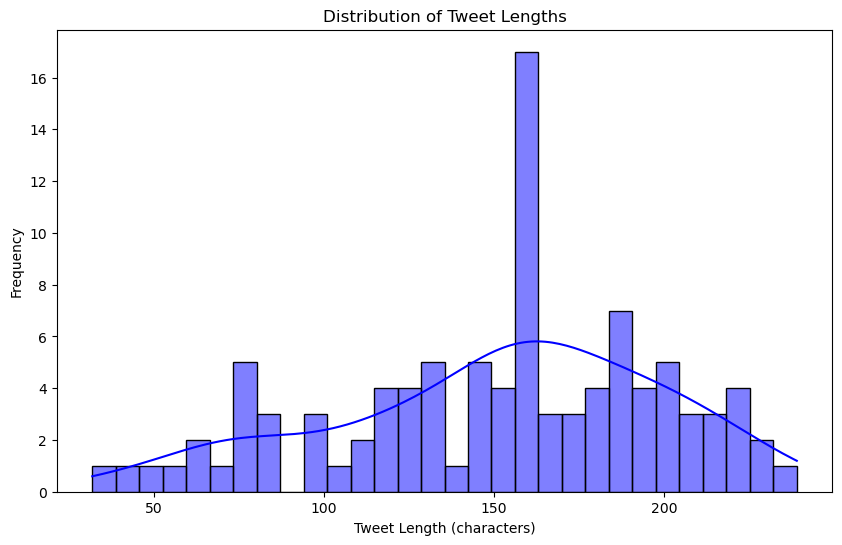

In [253]:
# Calculate the length of each tweet (number of characters)
tweets_df['tweet_length'] = tweets_df['cleaned_text'].apply(len)

# Visualize the distribution of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(tweets_df['tweet_length'], kde=True, color='blue', bins=30)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length (characters)")
plt.ylabel("Frequency")
plt.show()


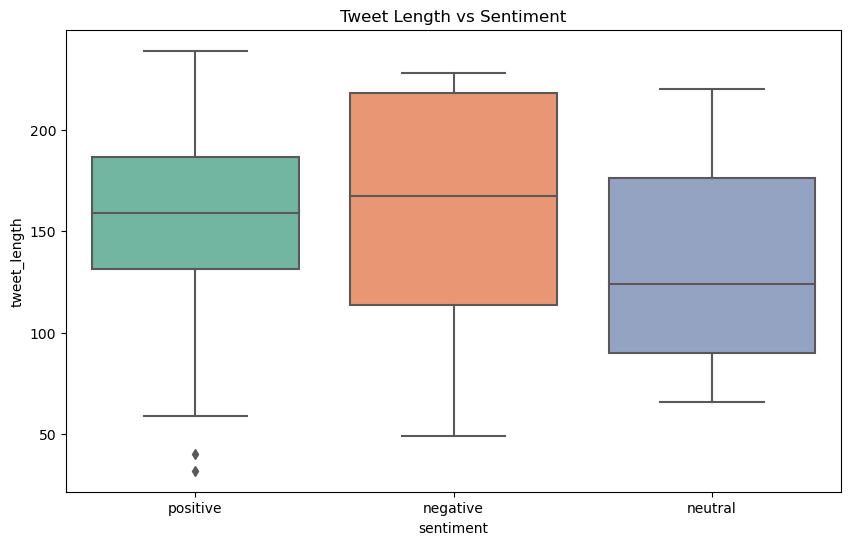

In [255]:
# Plot sentiment vs tweet length
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='tweet_length', data=tweets_df, palette='Set2')
plt.title("Tweet Length vs Sentiment")
plt.show()


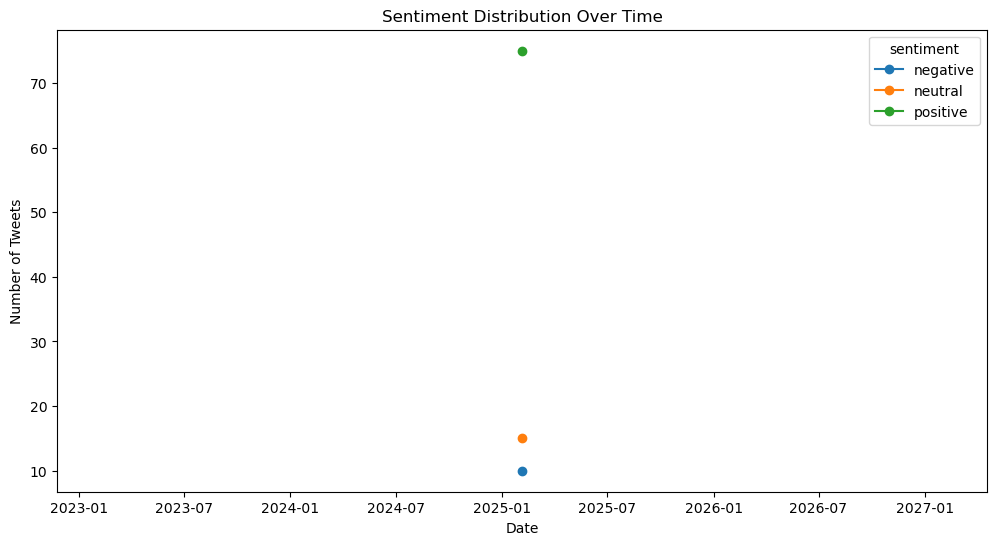

In [257]:
# Convert 'created_at' to datetime if it's not already
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])

# Extract date from the 'created_at' column
tweets_df['date'] = tweets_df['created_at'].dt.date

# Calculate daily sentiment distribution
daily_sentiment = tweets_df.groupby(['date', 'sentiment']).size().unstack().fillna(0)

# Plot daily sentiment distribution
daily_sentiment.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Sentiment Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.show()


In [259]:
# Import necessary libraries
import nltk
nltk.download('vader_lexicon')  # Download the VADER lexicon

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment score for each cleaned tweet
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # Compound score as the overall sentiment

# Create a new DataFrame for sentiment scores without modifying the original tweets_df
sentiment_df = pd.DataFrame()

# Add relevant columns from the original tweets_df to the sentiment_df
sentiment_df['tweet'] = tweets_df['tweet']
sentiment_df['cleaned_text'] = tweets_df['cleaned_text']

# Calculate sentiment scores for the cleaned text
sentiment_df['sentiment_score'] = sentiment_df['cleaned_text'].apply(get_sentiment_score)

# Display the new sentiment_df
print(sentiment_df.head(100))

# Optional: Save sentiment_df to a CSV file
# sentiment_df.to_csv('sentiment_scores.csv', index=False)


                                                tweet  \
0   Check out SupplyVest's innovative approach to ...   
1   #cPenNetwork is committed to becoming a revolu...   
2   Using AI In litigation: Applications, Advice, ...   
3   @RnaudBertrand AI as a zero-sum market is dang...   
4   #cPenNetwork is committed to becoming a revolu...   
..                                                ...   
95  Sam Altman Reveals OpenAI’s Plans for AI-Power...   
96  I really do wonder if AI will turn out to be a...   
97  #cPenNetwork is committed to becoming a revolu...   
98  🚀 Breaking barriers in AI &amp; crypto! $LEIA ...   
99  If Everyone Uses AI, How Can Organizations Dif...   

                                         cleaned_text  sentiment_score  
0   check supplyvests innovative approach supply c...           0.8271  
1   cpennetwork committed becoming revolutionary w...           0.7650  
2   using ai litigation application advice technology          -0.2023  
3   rnaudbertrand ai ze

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/emon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [261]:
#######Feature Extraction############


In [263]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the vectorizer (BoW example here)
vectorizer = CountVectorizer(stop_words='english')

# Apply to the cleaned_text column
X_bow = vectorizer.fit_transform(tweets_df['cleaned_text'])

# Convert to DataFrame
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Show the shape and the first few rows
print(bow_df.shape)  # Should show (100, <number of unique words>)
print(bow_df.head())  # Check the first few rows



(100, 917)
   ability  absolutely  accelerating  accepts  access  according  actor  \
0        0           0             0        0       0          0      0   
1        0           0             0        0       0          0      0   
2        0           0             0        0       0          0      0   
3        0           0             0        0       0          0      0   
4        0           0             0        0       0          0      0   

   adapt  adcockbrett  address  ...  writer  wsj  xminibb  xrp  yeahryy  year  \
0      0            0        0  ...       0    0        0    0        0     0   
1      0            0        0  ...       0    0        0    0        0     0   
2      0            0        0  ...       0    0        0    0        0     0   
3      0            0        0  ...       0    0        0    0        0     0   
4      0            0        0  ...       0    0        0    0        0     0   

   ylecun  yotta  youtube  zerosum  
0       0     

In [265]:
if 'sentiment' in bow_df:
    print("Column exists")
else:
    print("Column does not exist")

Column does not exist


In [267]:
tweets_df['cleaned_text'].isnull().sum()
print(tweets_df.shape)


(100, 6)


In [269]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Apply to the cleaned text
X_tfidf = tfidf_vectorizer.fit_transform(tweets_df['cleaned_text'])

# Convert the result to a DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.shape) 
# Show the first few rows of the transformed data
print(tfidf_df.head(100))


(100, 917)
    ability  absolutely  accelerating  accepts  access  according  actor  \
0       0.0         0.0           0.0      0.0     0.0        0.0    0.0   
1       0.0         0.0           0.0      0.0     0.0        0.0    0.0   
2       0.0         0.0           0.0      0.0     0.0        0.0    0.0   
3       0.0         0.0           0.0      0.0     0.0        0.0    0.0   
4       0.0         0.0           0.0      0.0     0.0        0.0    0.0   
..      ...         ...           ...      ...     ...        ...    ...   
95      0.0         0.0           0.0      0.0     0.0        0.0    0.0   
96      0.0         0.0           0.0      0.0     0.0        0.0    0.0   
97      0.0         0.0           0.0      0.0     0.0        0.0    0.0   
98      0.0         0.0           0.0      0.0     0.0        0.0    0.0   
99      0.0         0.0           0.0      0.0     0.0        0.0    0.0   

    adapt  adcockbrett  address  ...  writer  wsj  xminibb  xrp  yeahryy  \


In [271]:
# Check if a column exists in the DataFrame
if 'sentiment' in tfidf_df:
    print("Column exists")
else:
    print("Column does not exist")


Column does not exist


In [273]:
from scipy.sparse import hstack

# Combining BoW and TF-IDF into one feature matrix
X_combined = hstack([X_bow, X_tfidf])

# Convert to DataFrame for better understanding
X_combined_df = pd.DataFrame(X_combined.toarray())
print(bow_df.shape) 
print(X_combined_df.head())


(100, 917)
   0     1     2     3     4     5     6     7     8     9     ...  1824  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   1825  1826  1827  1828  1829  1830  1831  1832      1833  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.221672  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  

[5 rows x 1834 columns]


In [275]:
if 'sentiment' in X_combined_df:
    print("Column exists")
else:
    print("Column does not exist")

Column does not exist


In [277]:
######Data Splitting#########

In [285]:
print(tweets_df.head())

                 created_at  \
0 2025-02-04 05:31:01+00:00   
1 2025-02-04 05:30:48+00:00   
2 2025-02-04 05:30:41+00:00   
3 2025-02-04 05:30:28+00:00   
4 2025-02-04 05:30:26+00:00   

                                               tweet  \
0  Check out SupplyVest's innovative approach to ...   
1  #cPenNetwork is committed to becoming a revolu...   
2  Using AI In litigation: Applications, Advice, ...   
3  @RnaudBertrand AI as a zero-sum market is dang...   
4  #cPenNetwork is committed to becoming a revolu...   

                                        cleaned_text sentiment  tweet_length  \
0  check supplyvests innovative approach supply c...  positive           153   
1  cpennetwork committed becoming revolutionary w...  positive           160   
2  using ai litigation application advice technology  negative            49   
3  rnaudbertrand ai zerosum market dangerous ai t...  negative           207   
4  cpennetwork committed becoming revolutionary w...  positive           162

In [ ]:
#####Use Stome to balance the dataset######

In [287]:
from sklearn.model_selection import train_test_split

# Let's assume you have a target column 'sentiment' (positive/negative/neutral)
X = X_combined_df  # 
y =tweets_df['sentiment']  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed to model training


In [289]:
print(tweets_df.head())


                 created_at  \
0 2025-02-04 05:31:01+00:00   
1 2025-02-04 05:30:48+00:00   
2 2025-02-04 05:30:41+00:00   
3 2025-02-04 05:30:28+00:00   
4 2025-02-04 05:30:26+00:00   

                                               tweet  \
0  Check out SupplyVest's innovative approach to ...   
1  #cPenNetwork is committed to becoming a revolu...   
2  Using AI In litigation: Applications, Advice, ...   
3  @RnaudBertrand AI as a zero-sum market is dang...   
4  #cPenNetwork is committed to becoming a revolu...   

                                        cleaned_text sentiment  tweet_length  \
0  check supplyvests innovative approach supply c...  positive           153   
1  cpennetwork committed becoming revolutionary w...  positive           160   
2  using ai litigation application advice technology  negative            49   
3  rnaudbertrand ai zerosum market dangerous ai t...  negative           207   
4  cpennetwork committed becoming revolutionary w...  positive           162

In [291]:
#########Model######

In [293]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         2
    positive       0.85      1.00      0.92        17

    accuracy                           0.85        20
   macro avg       0.28      0.33      0.31        20
weighted avg       0.72      0.85      0.78        20



/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [295]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         2
    positive       0.85      1.00      0.92        17

    accuracy                           0.85        20
   macro avg       0.28      0.33      0.31        20
weighted avg       0.72      0.85      0.78        20



/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [299]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         2
    positive       0.85      1.00      0.92        17

    accuracy                           0.85        20
   macro avg       0.28      0.33      0.31        20
weighted avg       0.72      0.85      0.78        20



/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


In [297]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         2
    positive       0.85      1.00      0.92        17

    accuracy                           0.85        20
   macro avg       0.28      0.33      0.31        20
weighted avg       0.72      0.85      0.78        20



/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels for training
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the labels for testing
y_test_encoded = label_encoder.transform(y_test)



In [136]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the model with the encoded labels
xgb_model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
from sklearn.metrics import classification_report

print("XGBoost Classification Report:")
print(classification_report(y_test_encoded, y_pred_xgb))




XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.25      0.50      0.33         2
           2       0.88      0.82      0.85        17

    accuracy                           0.75        20
   macro avg       0.38      0.44      0.39        20
weighted avg       0.77      0.75      0.75        20



/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
# Reverse the encoding for predictions
y_pred_xgb_str = label_encoder.inverse_transform(y_pred_xgb)

# Reverse the encoding for actual labels in the test set
y_test_str = label_encoder.inverse_transform(y_test_encoded)

# Print classification report with original labels
print("XGBoost Classification Report (with original labels):")
print(classification_report(y_test_str, y_pred_xgb_str))


XGBoost Classification Report (with original labels):
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.25      0.50      0.33         2
    positive       0.88      0.82      0.85        17

    accuracy                           0.75        20
   macro avg       0.38      0.44      0.39        20
weighted avg       0.77      0.75      0.75        20



/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#########Model Comparison#######

In [150]:
# Compare all models
models = [("Logistic Regression", y_pred), 
          ("SVM", y_pred_svm), 
          ("Random Forest", y_pred_rf), 
          ("Naive Bayes", y_pred), 
          ("Gradient Boosting", y_pred_gb),
          ("XGBoost", y_pred_xgb_str)]

for name, y_pred in models:
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.25      0.50      0.33         2
    positive       0.88      0.82      0.85        17

    accuracy                           0.75        20
   macro avg       0.38      0.44      0.39        20
weighted avg       0.77      0.75      0.75        20


SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         2
    positive       0.85      1.00      0.92        17

    accuracy                           0.85        20
   macro avg       0.28      0.33      0.31        20
weighted avg       0.72      0.85      0.78        20


Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       

/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emon/anaconda3/lib/pytho

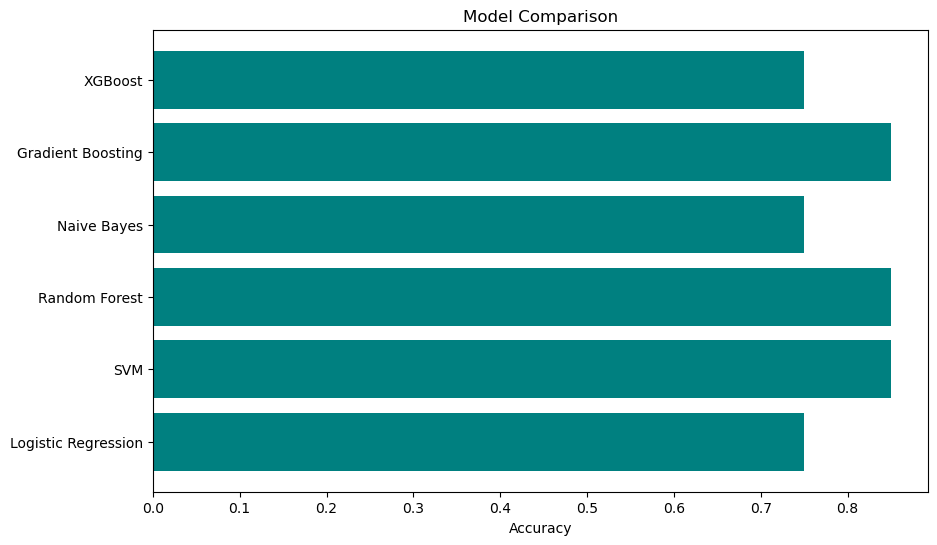

In [156]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score


# Store accuracies
accuracies = [accuracy_score(y_test, y_pred),
              accuracy_score(y_test, y_pred_svm),
              accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred),
              accuracy_score(y_test, y_pred_gb),
              accuracy_score(y_test, y_pred_xgb_str)]

# Plot the accuracies
models_names = ["Logistic Regression", "SVM", "Random Forest", "Naive Bayes", 
                "Gradient Boosting", "XGBoost"]
plt.figure(figsize=(10,6))
plt.barh(models_names, accuracies, color='teal')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.show()


In [158]:
print(tweets_df.head())


                 created_at  \
0 2025-02-04 05:31:01+00:00   
1 2025-02-04 05:30:48+00:00   
2 2025-02-04 05:30:41+00:00   
3 2025-02-04 05:30:28+00:00   
4 2025-02-04 05:30:26+00:00   

                                               tweet  \
0  Check out SupplyVest's innovative approach to ...   
1  #cPenNetwork is committed to becoming a revolu...   
2  Using AI In litigation: Applications, Advice, ...   
3  @RnaudBertrand AI as a zero-sum market is dang...   
4  #cPenNetwork is committed to becoming a revolu...   

                                        cleaned_text sentiment  tweet_length  \
0  check supplyvests innovative approach supply c...  positive           153   
1  cpennetwork committed becoming revolutionary w...  positive           160   
2  using ai litigation application advice technology  negative            49   
3  rnaudbertrand ai zerosum market dangerous ai t...  negative           207   
4  cpennetwork committed becoming revolutionary w...  positive           162

In [162]:
print(X_combined_df.head())

   0     1     2     3     4     5     6     7     8     9     ...  1824  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   1825  1826  1827  1828  1829  1830  1831  1832      1833  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.221672  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  

[5 rows x 1834 columns]
